In [87]:
import numpy as np
from scipy.stats import mode
from pbil import pbil
import multiprocessing
%pylab inline
%load_ext autoreload
%autoreload 2

import numpy as np
from numpy.random import random as srand
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/pio/os/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [88]:
data = np.loadtxt('../data/ImageRawReduced.txt')
targets = np.loadtxt('../data/ImageExpertReduced.txt')
rules = np.loadtxt('../data/ClassificationRules.txt')
data.shape, targets.shape, rules.shape

((3, 9350), (9350,), (266, 9350))

In [121]:
def draw_plots(scores_history, props_history, problem_title=None):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))
    if problem_title:
        fig.suptitle(problem_title, fontsize=20)
    ax1.plot(np.arange(len(scores_history)), scores_history)
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Score')
    ax1.set_title('Progress')

    print(props_history.shape)
    for x in np.array(props_history.T):
        ax2.plot(np.arange(x.size), x)
        ax2.set_title('Propabilities')
        ax2.set_xlabel('Iteration')
        ax2.set_ylabel('Propability')
    plt.show()

In [192]:
def process_instance(rules_mask):
#     [print(rules_mask.shape)]
    if np.all(rules_mask == 0):
        return 0
    temp = (mode(
        rules[rules_mask],
        axis=0
    )[0] == targets).sum()
#     return np.abs(temp - targets.size) / targets.size
    return temp
    
def f(pop):
    with multiprocessing.Pool(processes=multiprocessing.cpu_count()) as pool:
        res = pool.map(
            process_instance,
            (x for x in pop.T)
        )
    return np.array(res)

In [ ]:
%%time
%%capture output 

data = pbil(
        f,
        d=rules.shape[0],
        N=100,
        th1=0.05,
        th2=0.05,
        th3=0.05,
        steps=500
        
    )
draw_plots(
    *data,
    f"N: {rules.shape[0]}"
)

0.924278074866
(500, 266)


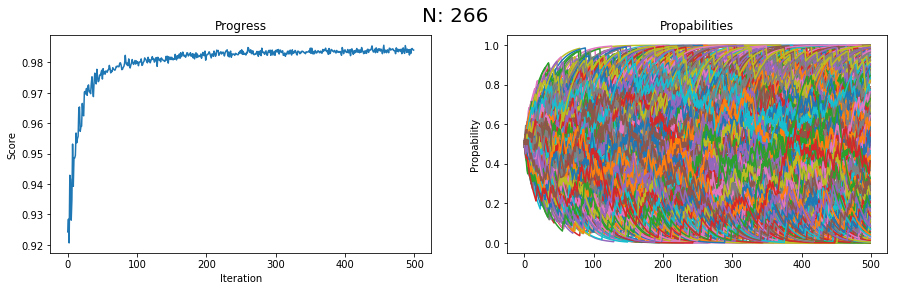

In [235]:
output.show()

(500, 266)
0.353816959432 0.153271149567 0.0731718590753
(500, 43)


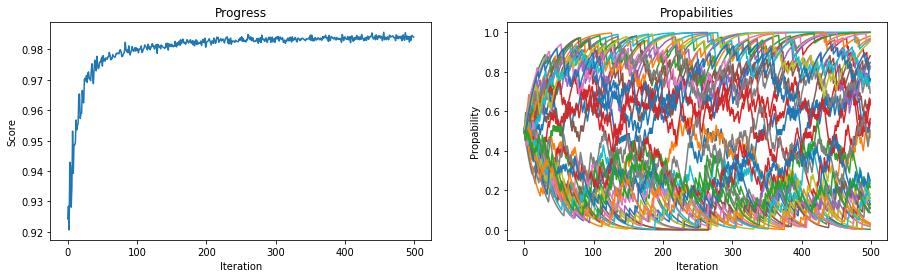

In [238]:
props = data[1]
print(props.shape)
std = np.std(props, axis=0)
print(std.max(), std.mean() , std.min())

draw_plots(data[0], props[:, std < 0.11])